In [1]:
import sys
sys.path.append("../../")

from astronn.preprocess import predeltascuti, precorot
from astronn.datasets import deltascuti, starmodels, corot
from astronn import models

import tensorflow as tf
from tensorflow import keras

import numpy as np

import matplotlib.pyplot as plt
import pandas as pd

from alibi.explainers import CounterFactual
from alibi.explainers import CounterFactualProto

Using TensorFlow backend.


0    16.942
1    19.378
2    20.622
3    18.984
Name: 1218, dtype: float64


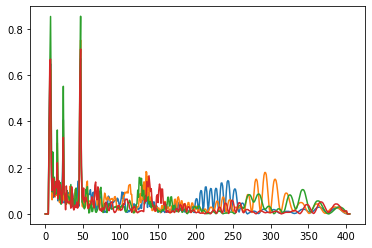

In [50]:
df = pd.read_csv("/home/roberto/Downloads/evolutionTracks_line/VO-m180fe-3a164o0rotjpzt5p5-ad/00275-m180fe-3a164o0rotjpzt5p5-ad.log", header=None)

id = {"dft":range(0, 406), "hod":range(406, 406*2), "ac":range(406*2, 406*3)}

df.loc[0,id["dft"]].plot()
df.loc[1,id["dft"]].plot()
df.loc[2,id["dft"]].plot()
df.loc[3,id["dft"]].plot()

print(df.loc[0:3,1218])

In [32]:
star_models = starmodels()
#df_sm = star_models.load("/home/roberto/Downloads/dataall_parts/*", batch_size=150, add_noise=True)
df_sm = star_models.load("/home/roberto/Downloads/evolutionTracks_line/*/*log", batch_size=250, add_noise=False)

(250, 406, 3)
tf.Tensor(
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.], shape=(100,), dtype=float32)


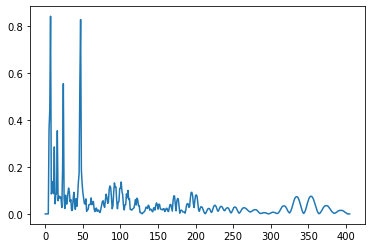

In [43]:
for star in df_sm.take(1):
    print(star[0].shape)
    id = 2
    print(star[1][id])
    plt.plot(star[0].numpy()[id,:,0])